## Welcome to our notebook with visualisations for Privacy Enhancing Techniques.
In this notebook we will try to explain to you what privacy enhancy techniques are and what effect they have on the __performance__ and __energy cost__ of a machine learning algorithm. We will do so by showing you different visualisations that contain data of a previously executed research. The goal of this notebook is to explain the effect of PET in the clearest way possible with these visualisations, and to gauge the effectiveness of the created visualisations by answering some questions

To give a short introduction on **Privacy Enhancing Techniques**: Privacy-enhancing techniques (PETs) are methods and tools that are designed to protect the privacy of sensitive information while still allowing it to be used for analysis or processing. They are commonly used in situations where there is a need to work with data that contains *personally identifiable information* (PII), such as medical records, financial transactions, or user behavior data. The main goal of PET's is to protect sensitive data while still allowing it to be used for useful purposes such as research, analysis, or business operations.


This notebook will start by giving you some visualisations on the effect that PET's have on energy cost. The data that will be used in this notebook originates from research where 2 privacy enhancing techniques have been tested: <br>
 - **Synthetic data** <br>
 - **K-anonimity** <br>
    
    
The 'enhanced' data has than been applied onto three different machine learning algorithms:<br>
- [*K-nearest neighbors*](#Algorithms-explained) <br>
- [*Neural Network*](#Algorithms-explained) <br> 
- [*Logistic regression*](#Algorithms-explained) 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objs as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash
from dash.dependencies import Input, Output

# Load the data
K_nn = pd.read_csv('Anonymisation\Energy\Energy_nn.csv')
K_knn = pd.read_csv('Anonymisation\Energy\Energy_knn.csv')
K_log = pd.read_csv('Anonymisation\Energy\Energy_logreg.csv')

#load the idle energy data
Bench_knn = pd.read_csv('Benchmark\Performance\Energy_knn.csv')

#drop the rows containing the student label to filter out the adult data
Bench_knn = Bench_knn[Bench_knn.label != 'Student']
Bench_knn = Bench_knn[-20:]

Bench_nn = pd.read_csv('Benchmark\Performance\Energy_nn.csv')
Bench_nn = Bench_nn[Bench_nn.label != 'Student']
Bench_log = pd.read_csv('Benchmark\Performance\Energy_logreg.csv')
Bench_log = Bench_log[Bench_log.label != 'Student']

#load datasets for the different values of k and algorithms
K3_nn = K_nn.loc[K_nn['label'] == 'Adult_3']
K10_nn = K_nn.loc[K_nn['label'] == 'Adult_10']
K27_nn = K_nn.loc[K_nn['label'] == 'Adult_27']

K3_knn = K_knn.loc[K_knn['label'] == 'Adult_3']
K10_knn = K_knn.loc[K_knn['label'] == 'Adult_10']
K27_knn = K_knn.loc[K_knn['label'] == 'Adult_27']

K3_log = K_log[K_log['label'] == 'Adult_3']
K10_log = K_log.loc[K_log['label'] == 'Adult_10']
K27_log = K_log.loc[K_log['label'] == 'Adult_27']

#load the syntetic datasets for the different algorithms
Syn_nn = pd.read_csv('Synthetic_data\Energy\Energy_nn.csv')
Syn_nn = Syn_nn[Syn_nn.label != 'Student']
Syn_knn = pd.read_csv('Synthetic_data\Energy\Energy_knn.csv')
Syn_knn = Syn_knn[Syn_knn.label != 'Student']
Syn_log =  pd.read_csv('Synthetic_data\Energy\Energy_logreg.csv')
Syn_log = Syn_log[Syn_log.label != 'Student']

Bench_acc_nn = pd.read_csv('Benchmark\Performance\Accuracy_nn_adult.csv')
Bench_acc_knn = pd.read_csv('Benchmark\Performance\Accuracy_knn_adult.csv')
Bench_acc_logreg = pd.read_csv('Benchmark\Performance\Accuracy_logreg_adult.csv')

Bench_acc_nn['numbers'] = Bench_acc_nn['Accuracy'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x)))
Bench_acc_nn['numbers'] = pd.to_numeric(Bench_acc_nn['numbers'].str[0], errors='coerce')
Bench_acc_nn = Bench_acc_nn.dropna()
Bench_acc_nn = Bench_acc_nn.drop(['numbers'], axis = 1)
Bench_acc_nn['Accuracy'].apply(lambda x: float(x))

Syn_acc_nn = pd.read_csv('Synthetic_data\output\Accuracy_nn_adult.csv')
Syn_acc_nn['numbers'] = Syn_acc_nn['Accuracy'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x)))
Syn_acc_nn['numbers'] = pd.to_numeric(Syn_acc_nn['numbers'].str[0], errors='coerce')
Syn_acc_nn = Syn_acc_nn.dropna()
Syn_acc_nn = Syn_acc_nn.drop(['numbers'], axis = 1)
Syn_acc_nn['Accuracy'].apply(lambda x: float(x))
Syn_acc_knn = pd.read_csv('Synthetic_data\output\Accuracy_knn_adult.csv')
Syn_acc_logreg = pd.read_csv('Synthetic_data\output\Accuracy_logreg_adult.csv')

K3_acc_nn = pd.read_csv(r'Anonymisation\Accuracies\nn_adult_3.csv')
K3_acc_nn['numbers'] = K3_acc_nn['Accuracy'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x)))
K3_acc_nn['numbers'] = pd.to_numeric(K3_acc_nn['numbers'].str[0], errors='coerce')
K3_acc_nn = K3_acc_nn.dropna()
K3_acc_nn = K3_acc_nn.drop(['numbers'], axis = 1)
K3_acc_nn['Accuracy'].apply(lambda x: float(x))

K3_acc_knn = pd.read_csv(r'Anonymisation\Accuracies\knn_adult_3.csv')
K3_acc_logreg = pd.read_csv(r'Anonymisation\Accuracies\logreg_adult_3.csv')

K10_acc_nn = pd.read_csv(r'Anonymisation\Accuracies\nn_adult_10.csv')
K10_acc_nn['numbers'] = K10_acc_nn['Accuracy'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x)))
K10_acc_nn['numbers'] = pd.to_numeric(K10_acc_nn['numbers'].str[0], errors='coerce')
K10_acc_nn = K10_acc_nn.dropna()
K10_acc_nn = K10_acc_nn.drop(['numbers'], axis = 1)
K10_acc_nn['Accuracy'].apply(lambda x: float(x))

K10_acc_knn = pd.read_csv(r'Anonymisation\Accuracies\knn_adult_10.csv')
K10_acc_logreg = pd.read_csv(r'Anonymisation\Accuracies\logreg_adult_10.csv')

K27_acc_nn = pd.read_csv(r'Anonymisation\Accuracies\nn_adult_27.csv')
K27_acc_nn = pd.read_csv(r'Anonymisation\Accuracies\nn_adult_10.csv')
K27_acc_nn['numbers'] = K27_acc_nn['Accuracy'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x)))
K27_acc_nn['numbers'] = pd.to_numeric(K27_acc_nn['numbers'].str[0], errors='coerce')
K27_acc_nn = K27_acc_nn.dropna()
K27_acc_nn = K27_acc_nn.drop(['numbers'], axis = 1)
K27_acc_nn['Accuracy'].apply(lambda x: float(x))


K27_acc_knn = pd.read_csv(r'Anonymisation\Accuracies\knn_adult_27.csv')
K27_acc_logreg = pd.read_csv(r'Anonymisation\Accuracies\logreg_adult_27.csv')




# Maken van een algemene df waarin energy wordt onderverdeeld in soort energy, per PET, per algoritme.
Data_nn = pd.DataFrame([
                     ['Benchmark', Bench_nn['pkg'].mean()* 10**-6, 'pkg'], ['Benchmark', Bench_nn['dram'].mean()* 10**-6, 'dram'],
                     ['Synthetic data', Syn_nn['pkg'].mean()* 10**-6, 'pkg'], ['Synthetic data', Syn_nn['dram'].mean()* 10**-6, 'dram'], 
                     ['K3-anonimity', K3_nn['pkg'].mean()* 10**-6, 'pkg'], ['K3-anonimity', K3_nn['dram'].mean()* 10**-6, 'dram'],
                     ['K10-anonimity', K10_nn['pkg'].mean()* 10**-6, 'pkg'], ['K10-anonimity', K10_nn['dram'].mean()* 10**-6, 'dram'],
                     ['K27-anonimity', K27_nn['pkg'].mean()* 10**-6, 'pkg'], ['K27-anonimity', K27_nn['dram'].mean()* 10**-6, 'dram'],
                        ],
columns=['PET', 'Energy', 'Energy_type'])

Data_nn['Algorithm'] = 'Neural Network'

Data_knn = pd.DataFrame([
                     ['Benchmark', Bench_knn['pkg'].mean()* 10**-6, 'pkg'], ['Benchmark', Bench_knn['dram'].mean()* 10**-6, 'dram'],
                     ['Synthetic data', Syn_knn['pkg'].mean()* 10**-6, 'pkg'], ['Synthetic data', Syn_knn['dram'].mean()* 10**-6, 'dram'], 
                     ['K3-anonimity', K3_knn['pkg'].mean()* 10**-6, 'pkg'], ['K3-anonimity', K3_knn['dram'].mean()* 10**-6, 'dram'],
                     ['K10-anonimity', K10_knn['pkg'].mean()* 10**-6, 'pkg'], ['K10-anonimity', K10_knn['dram'].mean()* 10**-6, 'dram'],
                     ['K27-anonimity', K27_knn['pkg'].mean()* 10**-6, 'pkg'], ['K27-anonimity', K27_knn['dram'].mean()* 10**-6, 'dram'],
                        ],
columns=['PET', 'Energy', 'Energy_type'])

Data_knn['Algorithm'] = 'K-nearest neighbors'

Data_log = pd.DataFrame([
                     ['Benchmark', Bench_log['pkg'].mean()* 10**-6, 'pkg'], ['Benchmark', Bench_log['dram'].mean()* 10**-6, 'dram'],
                     ['Synthetic data', Syn_log['pkg'].mean()* 10**-6, 'pkg'], ['Synthetic data', Syn_log['dram'].mean()* 10**-6, 'dram'], 
                     ['K3-anonimity', K3_log['pkg'].mean()* 10**-6, 'pkg'], ['K3-anonimity', K3_log['dram'].mean()* 10**-6, 'dram'],
                     ['K10-anonimity', K10_log['pkg'].mean()* 10**-6, 'pkg'], ['K10-anonimity', K10_log['dram'].mean()* 10**-6, 'dram'],
                     ['K27-anonimity', K27_log['pkg'].mean()* 10**-6, 'pkg'], ['K27-anonimity', K27_log['dram'].mean()* 10**-6, 'dram'],
                        ],
columns=['PET', 'Energy', 'Energy_type'])

Data_log['Algorithm'] = 'Logistic regression'

Full_df = pd.concat([Data_nn, Data_knn, Data_log], ignore_index=True, axis=0)



for x in Bench_acc_logreg.values:
    Bench_acc_logreg = float(x)


for x in Syn_acc_logreg.values:
    Syn_acc_logreg = float(x)


for x in K3_acc_logreg.values:
    K3_acc_logreg = float(x)


for x in K10_acc_logreg.values:
    K10_acc_logreg = float(x)


for x in K27_acc_logreg.values:
    K27_acc_logreg = float(x)

for x in Bench_acc_knn.values:
    Bench_acc_knn = float(x)

for x in Syn_acc_knn.values:
    Syn_acc_knn = float(x)


for x in K3_acc_knn.values:
    K3_acc_knn = float(x)


for x in K10_acc_knn.values:
    K10_acc_knn = float(x)


for x in K27_acc_knn.values:
    K27_acc_knn = float(x)

total_sum = 0
for x in Bench_acc_nn.values:
    value = float(x[0])  # Convert the value from string to float
    total_sum += value

Bench_acc_nn = total_sum/len(Bench_acc_nn)


total_sum = 0

for x in Syn_acc_nn.values:
    value = float(x)
    total_sum += value

Syn_acc_nn = total_sum / len(Syn_acc_nn)

total_sum = 0

for x in K3_acc_nn.values:
    value = float(x)
    total_sum += value

K3_acc_nn = total_sum / len(K3_acc_nn)

total_sum = 0

for x in K10_acc_nn.values:
    value = float(x)
    total_sum += value

K10_acc_nn = total_sum / len(K10_acc_nn)

total_sum = 0

for x in K27_acc_nn.values:
    value = float(x)
    total_sum += value

K27_acc_nn = total_sum / len(K27_acc_nn)
# print(K27_acc_nn)


# Calculate accuracies and store them in lists
logreg_accuracies = [Bench_acc_logreg, Syn_acc_logreg, K3_acc_logreg, K10_acc_logreg, K27_acc_logreg]
logreg_accuracies = [acc for acc in logreg_accuracies for _ in range(2)]  # Repeat each element twice

knn_accuracies = [Bench_acc_knn, Syn_acc_knn, K3_acc_knn, K10_acc_knn, K27_acc_knn]
knn_accuracies = [acc for acc in knn_accuracies for _ in range(2)]  # Repeat each element twice

nn_accuracies = [Bench_acc_nn, Syn_acc_nn, K3_acc_nn, K10_acc_nn, K27_acc_nn]
nn_accuracies = [acc for acc in nn_accuracies for _ in range(2)]  # Repeat each element twice

# Add accuracy column to each DataFrame
Data_log['Accuracy'] = logreg_accuracies
Data_knn['Accuracy'] = knn_accuracies
Data_nn['Accuracy'] = nn_accuracies

# Concatenate dataframes
Full_df = pd.concat([Data_nn, Data_knn, Data_log], ignore_index=True, axis=0)
# print(Data_log)
# print(Data_nn)
# print(Data_knn)







C:\Users\Roy Veenboer\AppData\Local\Temp\ipykernel_16684\459114821.py:9: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\Roy Veenboer\AppData\Local\Temp\ipykernel_16684\459114821.py:10: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



## Plots on energy Consumption

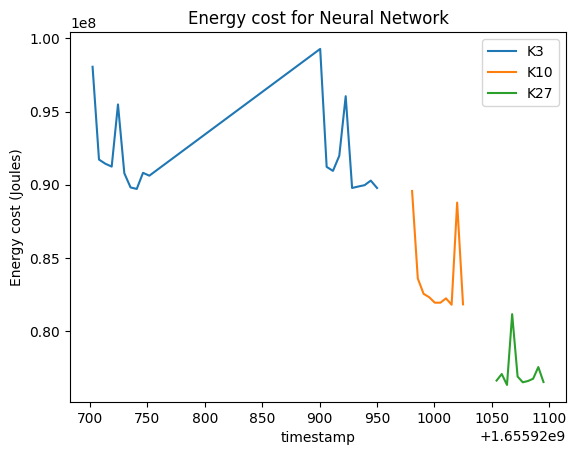

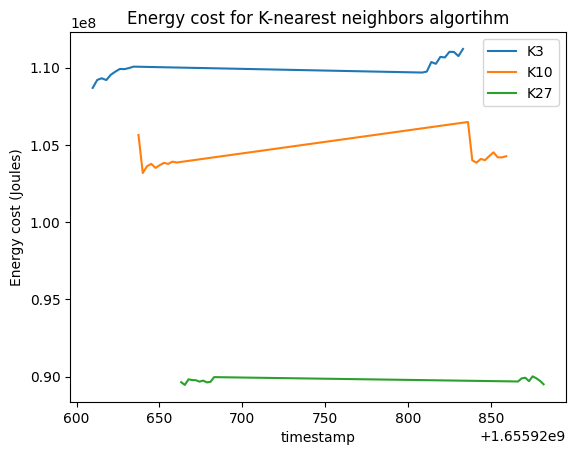

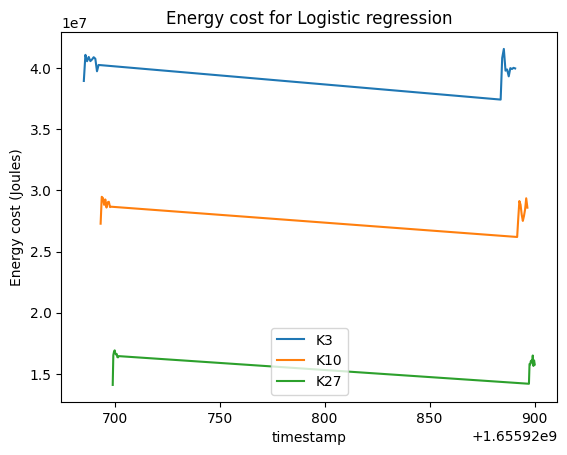

In [8]:

# Line plot of energy cost over time on neural network
plt.plot(K3_nn['timestamp'], K3_nn['pkg'] + K3_nn['dram'], label='K3')
plt.plot(K10_nn['timestamp'], K10_nn['pkg'] + K10_nn['dram'], label='K10')
plt.plot(K27_nn['timestamp'], K27_nn['pkg'] + K27_nn['dram'], label='K27')

plt.plot()
plt.xlabel('timestamp')
plt.ylabel('Energy cost (Joules)')
plt.legend()
plt.title(('Energy cost for Neural Network'))
plt.show()

# Line plot of energy cost over time on k nearest neigbhors
plt.plot(K3_knn['timestamp'], K3_knn['pkg'] + K3_knn['dram'], label='K3')
plt.plot(K10_knn['timestamp'], K10_knn['pkg'] + K10_knn['dram'], label='K10')
plt.plot(K27_knn['timestamp'], K27_knn['pkg'] + K27_knn['dram'], label='K27')

plt.plot()
plt.xlabel('timestamp')
plt.ylabel('Energy cost (Joules)')
plt.legend()
plt.title(('Energy cost for K-nearest neighbors algortihm'))
plt.show()


# Line plot of energy cost over time of logistic regresseion
plt.plot(K3_log['timestamp'], K3_log['pkg'] + K3_log['dram'], label='K3')
plt.plot(K10_log['timestamp'], K10_log['pkg'] + K10_log['dram'], label='K10')
plt.plot(K27_log['timestamp'], K27_log['pkg'] + K27_log['dram'], label='K27')

plt.plot()
plt.xlabel('timestamp')
plt.ylabel('Energy cost (Joules)')
plt.title('Energy cost for Logistic regression')
plt.legend()
plt.show()



***Experts:*** In **Figure 1** these plots show the energy consumption over time for three machine learning algorithms (Neural Network, K-Nearest Neighbors, Logistic Regression) paired with different Privacy Enhancement Techniques (K3, K10, K27). The x-axis represents time, while the y-axis shows energy cost in Joules. Each line corresponds to a privacy technique. By comparing these lines, we can see which combinations are more energy-efficient and how this changes over time, providing valuable insights for selecting the most suitable algorithm and privacy technique based on energy efficiency.

***Laymen:*** These charts show how much computer power is used over time by three different ways that computers can learn from data (Neural Network, K-Nearest Neighbors, Logistic Regression). Each chart uses different privacy techniques (K3, K10, K27) to protect the data. The bottom axis shows time, and the side axis shows how much energy is used. Each line on the chart represents a different privacy technique. By looking at these lines, we can see which combinations use less computer power and how this changes over time. This helps us choose the best way for the computer to learn from the data while using the least amount of energy.

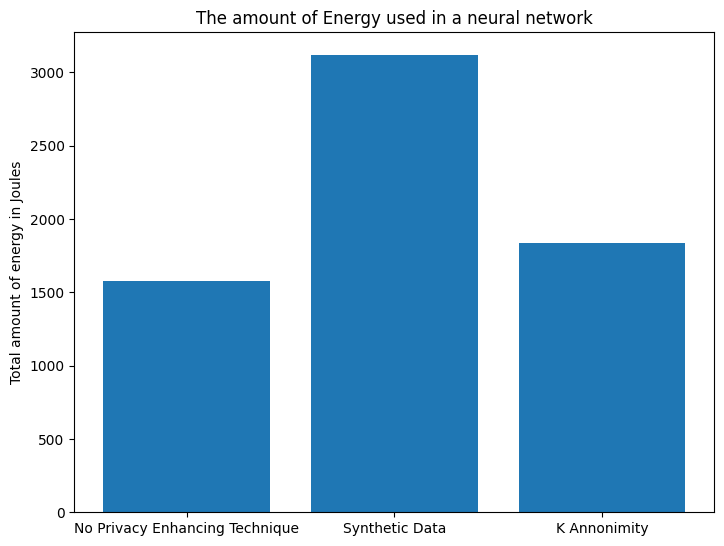

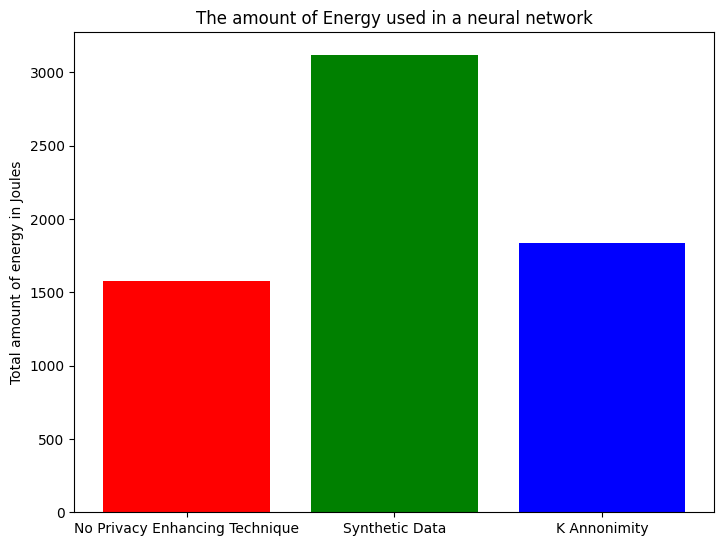

In [9]:

# Plot voor de experts
fig = go.Figure()

for Energy_type in ["pkg", "dram"]:
    tmp_df = Full_df.query(f"Energy_type == '{Energy_type}'")
    fig.add_trace(
        go.Bar(
            x=[tmp_df["Algorithm"], tmp_df["PET"]], y=tmp_df["Energy"], name=Energy_type,
        )
    )
    
fig.update_layout(barmode="stack", height=400, width=800, margin=dict(b=60, t=20, l=20, r=20))
fig.show()


# Plot voor de layman
Total_energy = [((Bench_nn['pkg'].sum() + Bench_nn['dram'].sum())* 10**-6), ((Syn_nn['pkg'].sum() + Syn_nn['dram'].sum())* 10**-6), ((K3_nn['pkg'].sum() + K3_nn['dram'].sum())* 10**-6)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
PET = ['No Privacy Enhancing Technique', 'Synthetic Data', 'K Annonimity']
values = Total_energy
ax.bar(PET,values)
plt.ylabel("Total amount of energy in Joules")
plt.title('The amount of Energy used in a neural network')
plt.show()

# Plot voor de layman met verschillende kleuren
colors = ['red', 'green', 'blue']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(PET, Total_energy, color=colors)
plt.ylabel("Total amount of energy in Joules")
plt.title('The amount of Energy used in a neural network')
plt.show()


***Experts:*** **Figure 2,3 and 4** visualizes the energy consumption of different machine learning algorithms combined with various Privacy Enhancement Techniques (PETs). Each bar represents a specific algorithm-PET combination, divided into two segments: PKG and DRAM, which are two types of energy measurements. The height of each segment corresponds to the energy consumption for that type. By stacking the segments, the total height of each bar represents the combined energy cost. This chart allows for a clear comparison of energy usage across different algorithm-PET combinations, and how the energy cost is distributed between PKG and DRAM.

***Layman:*** **Figure 2,3 and 4** show how much computer power different learning methods use when combined with various data protection techniques. Each bar is split into two parts: PKG and DRAM, which are two ways to measure energy use. The taller the bar, the more power is used. This helps us see which combinations use less power and how the power use is split between PKG and DRAM.



In [10]:

# Assuming Data_log, Data_knn, Data_nn are your dataframes

# Concatenate your dataframes
frames = [Data_log, Data_knn, Data_nn]
df = pd.concat(frames)

# Group by the PET and Algorithm to find the sum of Energy and mean of Accuracy
df_grouped = df.groupby(['PET', 'Algorithm']).agg({'Energy':'sum', 'Accuracy':'mean'}).reset_index()

# Extract unique PET types and ML algorithms
PET_types = df_grouped['PET'].unique()
algorithms = df_grouped['Algorithm'].unique()

# Initialize data list
data = []

# For each ML algorithm, create a Scatterpolar trace
for algorithm in algorithms:
    df_filtered = df_grouped[df_grouped['Algorithm'] == algorithm]
    r_values = df_filtered['Energy'].values * 10**-6  # Scale the energy values

    data.append(go.Scatterpolar(
        r=r_values,
        theta=PET_types,
        fill='toself',
        name=algorithm
    ))

# Define the layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_grouped['Energy'].max() * 10**-6]
        ),
    ),
    showlegend=True,
    title='Comparison of PETs and Machine Learning Algorithms (Energy Cost)',
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


***Experts:*** **Figure 5** This radar chart provides a visual comparison of the energy consumption for three machine learning algorithms - Logistic Regression, Neural Network, and K-Nearest Neighbors - when combined with various Privacy Enhancement Techniques (PETs). Each axis of the radar chart represents a different PET, and the distance from the center along each axis corresponds to the total energy cost for that specific PET. Each algorithm is represented by a filled shape, with the vertices of the shape indicating the energy cost for each PET. The larger the area of the shape, the higher the overall energy consumption for that algorithm across all PETs. By comparing these shapes, we can assess which combinations of algorithms and PETs are more energy-efficient. This chart provides a comprehensive, at-a-glance view of the performance trade-offs between energy consumption and the choice of algorithm and PET, making it a valuable tool for decision-making in machine learning applications.

***Layman:*** This chart shows how much computer power different learning methods use when combined with various data protection techniques. Each line from the center represents a different data protection technique. The further a point is from the center, the more power it uses. Each learning method is shown as a filled shape. By looking at these shapes, we can see which combinations use less power. This helps us choose the best way for the computer to learn from the data while using the least amount of energy.

In [11]:

# Concatenate your dataframes
frames = [Data_log, Data_knn, Data_nn]
df = pd.concat(frames)

# Group by the PET, Algorithm and Energy_type to find the sum of Energy
df_grouped = df.groupby(['PET', 'Algorithm', 'Energy_type']).agg({'Energy':'sum'}).reset_index()

fig = px.bar(df_grouped, x="Algorithm", y="Energy", color="Energy_type", barmode="group", facet_col="PET", title="Energy Cost across different PETs and Algorithms")

# Show the figure
fig.show()


***Experts:*** **Figure 6** This grouped bar chart provides a detailed comparison of the energy consumption for three machine learning algorithms - Logistic Regression, Neural Network, and K-Nearest Neighbors - when combined with various Privacy Enhancement Techniques (PETs).
Each bar represents the energy cost for a specific algorithm-PET combination, further divided into two segments: PKG and DRAM, which are two types of energy measurements. The height of each segment corresponds to the energy consumption for that type.
The chart is divided into several panels, each representing a different PET. Within each panel, the algorithms are represented on the x-axis, and the total energy cost on the y-axis.
By comparing these bars, we can assess the relative energy efficiency of the algorithms for different PETs and how the energy cost is distributed between PKG and DRAM. This chart provides a comprehensive view of the energy consumption across different algorithms and PETs.

***Layman:*** This chart shows how much computer power different learning methods use when combined with various data protection techniques. Each bar represents a learning method, split into two parts: PKG and DRAM, which are two ways to measure energy use. The chart is divided into sections, each for a different data protection technique. By looking at the bars, we can see which combinations use less power and how the power use is split between PKG and DRAM. This helps us choose the best way for the computer to learn from the data while using the least amount of energy.

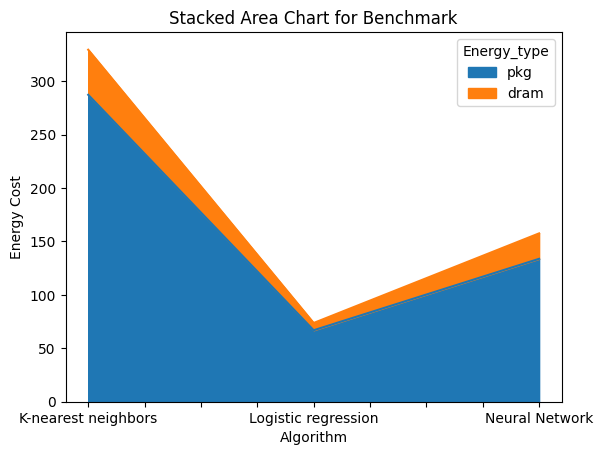

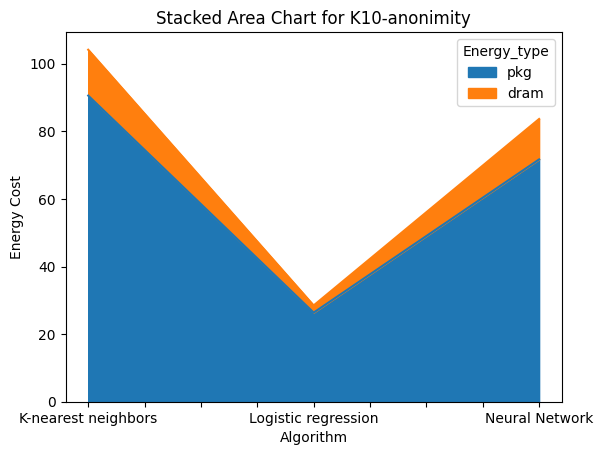

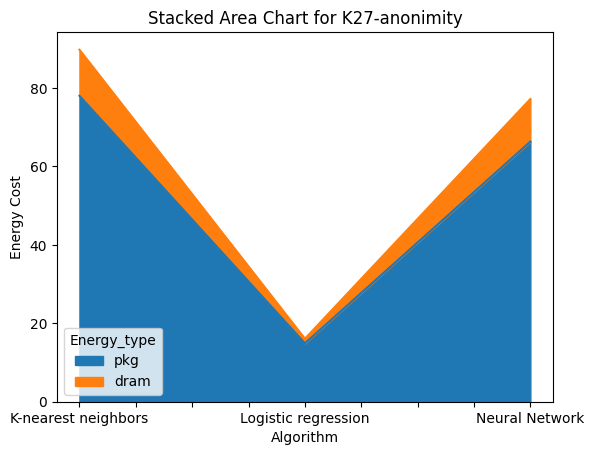

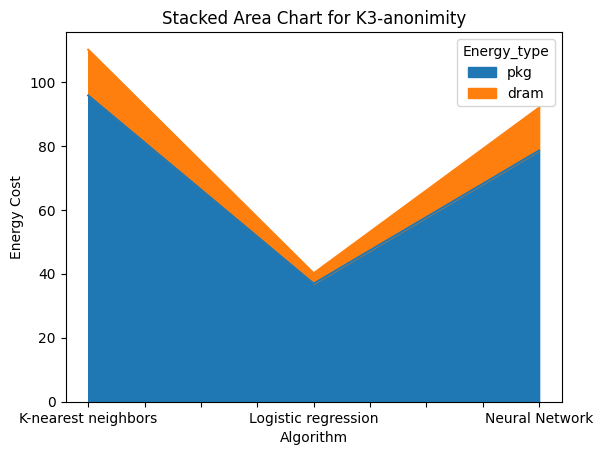

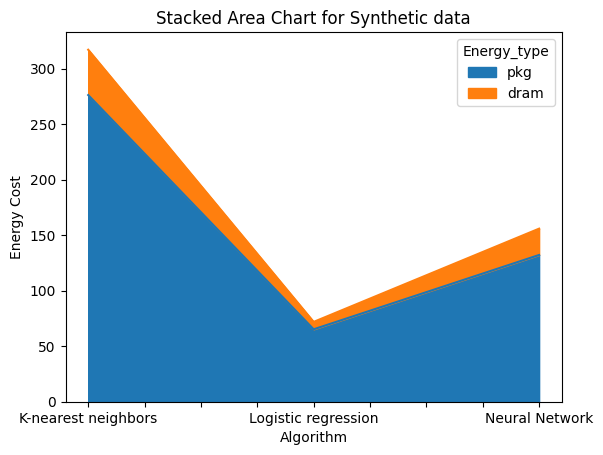

In [13]:
# Concatenate your dataframes
frames = [Data_log, Data_knn, Data_nn]
df = pd.concat(frames)

# Pivot the data to have energy types as columns
df_pivot = df.pivot_table(index=['PET', 'Algorithm'], columns='Energy_type', values='Energy', aggfunc='sum').reset_index()

# Let's sort the data to maintain a consistent order in the plot
df_pivot.sort_values(by=['PET', 'Algorithm'], inplace=True)

# For each unique PET, create a separate plot
for pet in df_pivot['PET'].unique():
    df_pet = df_pivot[df_pivot['PET'] == pet]
    df_pet.plot.area(x='Algorithm', y=['pkg', 'dram'], stacked=True)

    plt.title(f'Stacked Area Chart for {pet}')
    plt.xlabel('Algorithm')
    plt.ylabel('Energy Cost')
    plt.show()


***Experts:*** **Figure 7,8,9,10,11 and 12** These stacked area charts provide a visual comparison of the energy consumption for three machine learning algorithms - Logistic Regression, Neural Network, and K-Nearest Neighbors - when combined with various Privacy Enhancement Techniques (PETs).
Each chart corresponds to a different PET, with the algorithms represented on the x-axis and the total energy cost on the y-axis. The area under each curve is divided into two segments: PKG and DRAM, which are two types of energy measurements. The size of each segment corresponds to the energy consumption for that type.
By comparing these areas, we can assess the relative energy efficiency of the algorithms for different PETs and how the energy cost is distributed between PKG and DRAM. These charts provide a comprehensive view of the energy consumption across different algorithms and PETs, highlighting the trade-offs between energy efficiency and the choice of algorithm and PET.

***Layman:*** These charts show how much computer power different learning methods use when combined with various data protection techniques. Each chart is for a different data protection technique. The bottom axis shows the learning method, and the side axis shows how much energy is used. The area under each line is split into two parts: PKG and DRAM, which are two ways to measure energy use. By looking at these areas, we can see which combinations use less power and how the power use is split between PKG and DRAM. This helps us choose the best way for the computer to learn from the data while using the least amount of energy.

## Plots on Acurracy and Energy cost

In [14]:
# Combine the datasets
frames = [Data_log, Data_nn, Data_knn]
df = pd.concat(frames)

# Convert Energy from wide to long format and compute total energy
df['Energy'] = df['Energy'].astype(float)
df = df.pivot_table(index=['PET', 'Algorithm', 'Accuracy'], columns='Energy_type', values='Energy', aggfunc=sum).reset_index()
df['Total Energy'] = df['pkg'] + df['dram']

app = JupyterDash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Energy and Accuracy per Algorithm and PET'),

    dcc.Dropdown(
        id='pets-dropdown',
        options=[{'label': i, 'value': i} for i in df.PET.unique()],
        multi=True,
        value=df.PET.unique().tolist()
    ),

    dcc.Graph(id='example-graph')
])


@app.callback(
    Output('example-graph', 'figure'),
    [Input('pets-dropdown', 'value')])
def update_graph(selected_pets):
    filtered_df = df[df.PET.isin(selected_pets)]

    data = []
    for pet in selected_pets:
        pet_df = filtered_df[filtered_df['PET'] == pet]
        for algorithm in pet_df['Algorithm'].unique():
            data.append(go.Bar(
                x=pet_df[pet_df['Algorithm'] == algorithm]['Algorithm'],
                y=pet_df[pet_df['Algorithm'] == algorithm]['Total Energy'],
                name=f"{pet} - {algorithm}"
            ))

    figure={
        'data': data,
        'layout': go.Layout(
            xaxis={'title': 'Algorithm'},
            yaxis={'title': 'Total Energy'},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
            legend={'x': 1, 'y': 0.5},  # this places the legend to the right of the plot
            hovermode='closest',
            barmode='group'
        )
    }
    
    return figure

app.run_server(mode='inline', port=8054)



Dash is running on http://127.0.0.1:8054/



***Experts:*** **Figure 13** This interactive bar chart provides a detailed comparison of the total energy consumption for three machine learning algorithms - Logistic Regression, Neural Network, and K-Nearest Neighbors - when combined with various user-selected Privacy Enhancement Techniques (PETs).
The x-axis represents the algorithms, and the y-axis represents the total energy cost, calculated as the sum of the PKG and DRAM energy types. Each bar corresponds to a specific algorithm-PET combination.
The chart includes a dropdown menu that allows users to select one or more PETs to display on the chart. Upon selection, the chart updates to show only the bars corresponding to the selected PETs.
By comparing these bars, users can assess the relative energy efficiency of the algorithms for different PETs. This interactive chart provides a user-friendly tool for exploring the energy consumption across different algorithms and PETs, facilitating informed decision-making in machine learning applications.

***Layman:***
This interactive chart shows how much computer power different learning methods use when combined with various data protection techniques. Each bar represents a learning method, and the height of the bar shows how much energy it uses. The chart includes a dropdown menu that lets you choose which data protection techniques to display. When you select a technique, the chart updates to show only the bars for that technique. By comparing these bars, you can see which combinations use less power. This chart makes it easy to explore and understand how different learning methods and data protection techniques affect computer power use.

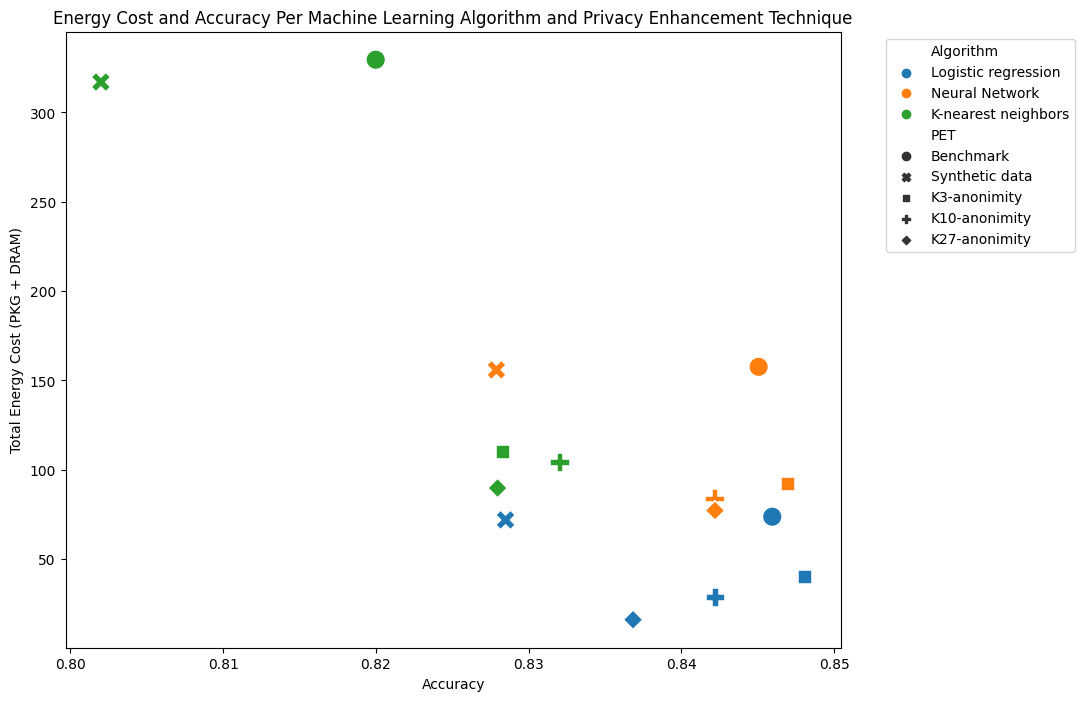

In [15]:
# Assuming Data_log, Data_nn, and Data_knn are your dataframes

# Combine all datasets into one
Data_all = pd.concat([Data_log, Data_nn, Data_knn])

# Calculate total energy cost
Data_all['Energy'] = Data_all.groupby(['PET', 'Algorithm'])['Energy'].transform('sum')

# Drop the 'Energy_type' column
Data_all = Data_all.drop(columns='Energy_type')

# Remove duplicates
Data_all = Data_all.drop_duplicates()


plt.figure(figsize=(10,8))
scatter = sns.scatterplot(data=Data_all, x="Accuracy", y="Energy", hue="Algorithm", style="PET", s=200) # Increase value here for bigger points
plt.title('Energy Cost and Accuracy Per Machine Learning Algorithm and Privacy Enhancement Technique')
plt.xlabel('Accuracy')
plt.ylabel('Total Energy Cost (PKG + DRAM)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



***Experts:*** **Figure 14** This scatter plot provides a visual comparison of the energy cost and accuracy of three different machine learning algorithms - Logistic Regression, Neural Network, and K-Nearest Neighbors - when combined with various Privacy Enhancement Techniques (PETs).
The x-axis represents the accuracy of the algorithms, while the y-axis represents the total energy cost. Each point on the graph corresponds to a specific combination of a machine learning algorithm and a PET. The color of the points indicates the algorithm used (Logistic Regression, Neural Network, or K-Nearest Neighbors), and the shape of the points represents the PET used (Benchmark, Synthetic data, K3-anonimity, K10-anonimity, or K27-anonimity).
By comparing these points, we can identify which combinations of algorithms and PETs provide the best balance between energy efficiency and prediction accuracy. This graph provides a comprehensive overview of the performance of different machine learning algorithms with various PETs, in terms of both energy cost and accuracy.

***Layman:*** This chart shows how different ways that computers can learn from data perform when we add different privacy techniques. These techniques help protect the data being used. The bottom axis shows how often the computer gets the answer right, and the side axis shows how much computer power it takes to run the method. Each point on the chart is a combination of a learning method and a privacy technique. By looking at the chart, we can see which combinations are more accurate and use less power, helping us choose the best way for the computer to learn from the data.

In [16]:
# Assuming Data_log, Data_knn, Data_nn are your dataframes

# Concatenate your dataframes
frames = [Data_log, Data_knn, Data_nn]
df = pd.concat(frames)

# Group by the PET and Algorithm to find the sum of Energy and mean of Accuracy
df_grouped = df.groupby(['PET', 'Algorithm']).agg({'Energy':'sum', 'Accuracy':'mean'}).reset_index()

# Extract unique PET types and ML algorithms
PET_types = df_grouped['PET'].unique()
algorithms = df_grouped['Algorithm'].unique()

# Initialize data list
data = []

# For each ML algorithm, create a Scatter3d trace
for algorithm in algorithms:
    df_filtered = df_grouped[df_grouped['Algorithm'] == algorithm]
    x_values = df_filtered['PET'].values  # PET values
    y_values = df_filtered['Energy'].values * 10**-6  # Scale the energy values
    z_values = df_filtered['Accuracy'].values  # Accuracy values

    data.append(go.Scatter3d(
        x=x_values,
        y=y_values,
        z=z_values,
        mode='markers',  # Use markers to represent the data points
        marker=dict(
            size=8,  # Set the size of the markers
            opacity=0.8,  # Set the opacity of the markers
        ),
        name=algorithm,  # Name of the ML algorithm
        hovertemplate=
        '<b>%{x}</b><br><b>' + algorithm + '</b><br>' +
        '<b>Energycost</b>: %{y}<br>' +
        '<b>Accuracy</b>: %{z}<br>'
    ))


# Define the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='PET'),  # Set the title of the x-axis
        yaxis=dict(title='Energy Cost'),  # Set the title of the y-axis
        zaxis=dict(title='Accuracy'),  # Set the title of the z-axis
    ),
    showlegend=True,  # Show the legend
    title='Relationship between PET, Energy Cost, and Accuracy',  # Set the title of the chart
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


***Experts*** **Figure 15** This 3D scatter plot provides a comprehensive visualization of the relationship between Privacy Enhancement Techniques (PETs), energy cost, and accuracy for three machine learning algorithms - Logistic Regression, Neural Network, and K-Nearest Neighbors.
Each axis of the 3D plot represents a different variable: PETs on the x-axis, energy cost on the y-axis, and accuracy on the z-axis. Each point in the 3D space corresponds to a specific combination of a machine learning algorithm and a PET, with the position of the point indicating the energy cost and accuracy of that combination.
Each algorithm is represented by a different set of points, allowing for a clear comparison of the performance of the algorithms across different PETs. By rotating and zooming the 3D plot, users can explore the data from various angles and gain insights into the trade-offs between energy efficiency and accuracy for different algorithm-PET combinations.
This 3D scatter plot provides a powerful tool for visualizing and understanding the complex relationships between PETs, energy cost, and accuracy in machine learning applications.

***Laymen*** This 3D chart shows how different ways that computers can learn from data perform when we add different privacy techniques. These techniques help protect the data being used. The three axes of the chart show the privacy technique, how much computer power it takes to run the method, and how often the computer gets the answer right. Each point on the chart is a combination of a learning method and a privacy technique. By looking at the chart from different angles, we can see which combinations are more accurate and use less power, helping us choose the best way for the computer to learn from the data.

In [17]:
# Assuming Data_log, Data_knn, Data_nn are your dataframes

# Concatenate your dataframes
frames = [Data_log, Data_knn, Data_nn]
df = pd.concat(frames)

# Group by the PET and Algorithm to find the sum of Energy and mean of Accuracy
df_grouped = df.groupby(['PET', 'Algorithm']).agg({'Energy':'sum', 'Accuracy':'mean'}).reset_index()

# Pivot the data for the heatmap
df_pivot_energy = df_grouped.pivot(index='PET', columns='Algorithm', values='Energy')
df_pivot_accuracy = df_grouped.pivot(index='PET', columns='Algorithm', values='Accuracy')

# Create an array for hover text with all the details
hovertext = np.empty_like(df_pivot_energy, dtype=object)
for i in range(df_pivot_energy.shape[0]):
    for j in range(df_pivot_energy.shape[1]):
        hovertext[i, j] = (f'PET: {df_pivot_energy.index[i]}<br>'
                           f'Machine learning algorithm: {df_pivot_energy.columns[j]}<br>'
                           f'Accuracy: {df_pivot_accuracy.iloc[i, j]:.2f}<br>'
                           f'Energycost: {df_pivot_energy.iloc[i, j]:.2f}')

# Define the data
data = [
    go.Heatmap(
        z=df_pivot_energy.values,  # Energy Cost values
        x=df_pivot_energy.columns,  # PET labels
        y=df_pivot_energy.index,  # ML Algorithm labels
        hovertext=hovertext,  # Hover text
        hoverinfo='text',  # Display the hover text
        colorscale='Viridis',  # Set the colorscale
    )
]

# Define the layout
layout = go.Layout(
    title='Heatmap of Energy Cost and Accuracy for Different PETs and ML Algorithms',  # Set the title of the chart
    xaxis=dict(title='Machine Learning Algorithm'),  # Set the title of the x-axis
    yaxis=dict(title='PET'),  # Set the title of the y-axis
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


***Experts*** **figure 16** 
This heatmap provides a visual representation of the energy cost associated with different combinations of machine learning algorithms and Privacy Enhancement Techniques (PETs).
The x-axis represents the machine learning algorithms (Logistic Regression, Neural Network, and K-Nearest Neighbors), and the y-axis represents the PETs (Benchmark, Synthetic data, K3-anonimity, K10-anonimity, and K27-anonimity). Each cell in the heatmap corresponds to a specific combination of a machine learning algorithm and a PET. The color of the cell indicates the energy cost of that combination, with darker colors representing higher energy costs.
When you hover over a cell, a tooltip appears showing the PET, the machine learning algorithm, the accuracy, and the energy cost for that combination. This interactive feature allows users to easily access detailed information about each combination.
By examining the heatmap, users can identify which combinations of algorithms and PETs are most energy-efficient. This visualization provides a comprehensive overview of the energy costs associated with different machine learning algorithms and PETs, facilitating informed decision-making in machine learning applications.

***laymen*** 
This color-coded chart, or "heatmap," shows how much computer power different learning methods use when we add different privacy techniques. These techniques help protect the data being used. The chart has different learning methods on one side and privacy techniques on the other. Each square on the chart is a combination of a learning method and a privacy technique. The color of the square shows how much computer power the combination uses, with darker colors meaning more power. When you hover over a square, you can see more details about the combination. This chart helps us see which combinations use less power, helping us choose the best way for the computer to learn from the data.

In [18]:
# Assuming Data_log, Data_knn, Data_nn are your dataframes

# Concatenate your dataframes
frames = [Data_log, Data_knn, Data_nn]
df = pd.concat(frames)

# Group by the PET and Algorithm to find the sum of Energy and mean of Accuracy
df_grouped = df.groupby(['PET', 'Algorithm']).agg({'Energy':'sum', 'Accuracy':'mean'}).reset_index()

# Extract unique PET types and ML algorithms
PET_types = df_grouped['PET'].unique()
algorithms = df_grouped['Algorithm'].unique()

# Initialize marker sizes (this should be customized based on your needs)
# marker_sizes = [10, 20, 30, 40, 50]  # Adjust this list according to the number of unique PET types

# Create a mapping from PET type to marker size
# PET_to_size = dict(zip(PET_types, marker_sizes))
tints = ['green', 'black', 'blue']

# For each ML algorithm, create a scatter plot
for algorithm, tint in zip(algorithms, tints):
    df_filtered = df_grouped[df_grouped['Algorithm'] == algorithm]
    x_values = df_filtered['Energy'].values  # Energy values
    y_values = df_filtered['Accuracy'].values  # Accuracy values
#     sizes = [PET_to_size[PET] for PET in df_filtered['PET'].values]  # Sizes according to PET types
#     sizes = [ for PET in df_filtered['PET'].values]  # Sizes according to PET types


    # Create a scatter plot
    fig = go.Figure(data=[
        go.Scatter(
            x=x_values,
            y=y_values,
            
            mode='markers',
            marker=dict(
                size = 20,
                color = tint
#                 size=sizes,  # Set the size of the markers
#                 sizemode='diameter'  # Set the sizemode
            ),
            text=df_filtered['PET'].values,  # Set the text for the hover info
            name=algorithm  # Name of the ML algorithm
        )
    ])

    # Set the title and labels
    fig.update_layout(
        title=f'Energy Cost vs Accuracy for {algorithm}',
        xaxis_title='Energy Cost',
        yaxis_title='Accuracy',
        showlegend=True
    )

    # Show the figure
    fig.show()


***Experts*** **figure 17, 18 and 19** These scatter plots provide a visual comparison of the energy cost and accuracy for three machine learning algorithms - Logistic Regression, Neural Network, and K-Nearest Neighbors - when combined with various Privacy Enhancement Techniques (PETs).
Each plot corresponds to a different algorithm, with the x-axis representing the total energy cost and the y-axis representing the accuracy. Each point on the plot corresponds to a specific PET, with its position indicating the energy cost and accuracy for that PET. The color of the points indicates the algorithm used.
By comparing these points, we can identify which PETs provide the best balance between energy efficiency and prediction accuracy for each algorithm. These plots provide a comprehensive overview of the performance of different PETs for each machine learning algorithm, in terms of both energy cost and accuracy.

***laymen*** These charts show how different ways that computers can learn from data perform when we add different privacy techniques. These techniques help protect the data being used. Each chart is for a different learning method. The bottom axis shows how much computer power it takes to run the method, and the side axis shows how often the computer gets the answer right. Each point on the chart is a privacy technique. By looking at the charts, we can see which techniques use less power and get the answer right more often for each learning method. This helps us choose the best way for the computer to learn from the data.

# Evaluation of the visualisations

Now that you have read through this notebook and hopefully have gained more knowledge about the subject of Privacy enhancing techniques, we would like to see how well you have understood our visualisations. Please follow the link below and answer the questions there. During the survey you are allowed to go back and forth towards the notebook to check back upon the visualisations and text. 



Questions on energy usage
- Based on figure 1, which k value resulted in the lowest energy cost for the neural network algorithm?
- Looking at the graphs, which algorithm resulted in the highest energy cost for k=10?
- According to the the graphs, which k value resulted in the lowest energy cost for the logistic regression algorithm?
- How does the energy cost of the k nearest neighbors algorithm compare to the other two algorithms at k=27?
- Which privacy enhancement technique resulted in the lowest energy cost on average across all three machine learning algorithms?

- How does the energy cost of the logistic regression algorithm compare to the other two algorithms at k=10?


Questions on accuracy loss





- Comparing a plot of the laymen notebook with an expert plot, do you prefer the layman plot?

# Algorithms explained



**Logistic regression** is a statistical model used for binary classification tasks, where the goal is to predict the probability of an instance belonging to one of two possible classes. For example, a logistic regression model tries to predict whether a tumor can be malignent or benign. It does this by looking at available data of both tumor types and tries to find a pattern in this data to predict new tumor cases.

The key idea behind logistic regression is to model the relationship between the input variables (also called features or independent variables) and the binary output variable (also called the dependent variable or target) using a logistic function. The algorithm does this by linking a weight to the different variables of the dataset. To give an example, when an algortihm tries to predict what type a tumor is it might give a higher weight to things like cel production rate. Since a higher value of this variable would mean a higher chance of a tumor being malignant. Other variables might be less important and receive a lower weight. When weight for all variables are culculated the algorithm can try to predict values by filling in the variable values and multiplying them by these created weights. The value will lie between 1-0 and will lie closest to one of the two. 

In logistic regression, the input features are combined linearly using weights (coefficients), similar to linear regression. However, instead of directly predicting a continuous output like in linear regression, logistic regression applies the logistic function to the linear combination of features and predicts the probability of the instance belonging to the positive class.

Logistic regression is widely used in various fields, including **healthcare, finance, marketing, and social sciences**, where binary classification problems are prevalent and interpretability is valuable.




